In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from plotnine import *

### Reading csv

In [3]:
db=pd.read_csv("C:/Users/Aaron Shabanian/Documents/MachineLearning/MachineLearningAssignment1/iris-1.csv")
#Above path is specific to my pc, it would have to be changed to specific work station path to csv
db.head()
db

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Not-Iris-setosa
146,147,6.3,2.5,5.0,1.9,Not-Iris-setosa
147,148,6.5,3.0,5.2,2.0,Not-Iris-setosa
148,149,6.2,3.4,5.4,2.3,Not-Iris-setosa


### Examining the data 

Looking at the dataset there does appear to be a patern where the smaller Petal Widths are Iris setosas while the bigger petal values are not. 

In [4]:
total=0
db.dropna()
iris=db[db["Species"]=="Iris-setosa"]
for index, row in iris.iterrows():
    total+=row["PetalWidthCm"]
avg=total/len(iris)
total=0
nonIris=db[db["Species"]=="Not-Iris-setosa"]
for index, row in nonIris.iterrows():
    total+=row["PetalWidthCm"]
avg2=total/len(nonIris)
print("Petal width of Iris-setosa " + str(avg))
print("Petal width of Not-Iris-setosa " + str(avg2))

Petal width of Iris-setosa 0.2439999999999999
Petal width of Not-Iris-setosa 1.6760000000000006


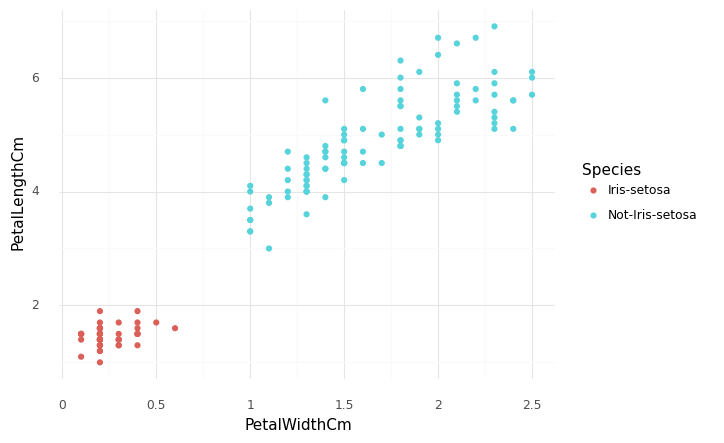

<ggplot: (167144884749)>

In [5]:
(ggplot(db, aes(x="PetalWidthCm", y="PetalLengthCm", color="Species"))+geom_point()+theme_minimal())

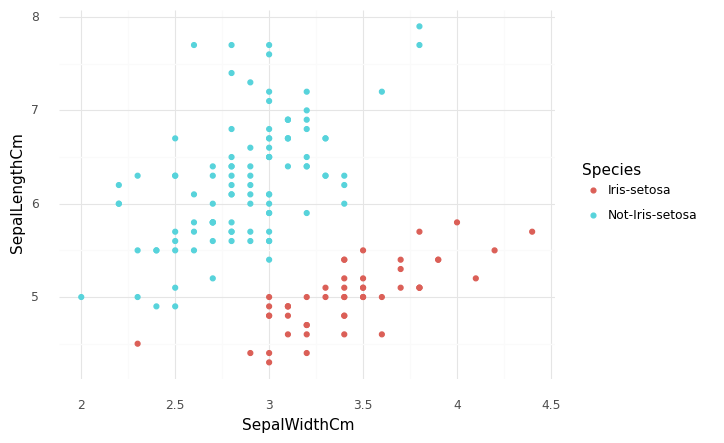

<ggplot: (167144892142)>

In [6]:
(ggplot(db, aes(x="SepalWidthCm", y="SepalLengthCm", color="Species"))+geom_point()+theme_minimal())

This confirms my earlier assumption that that the bigger petal widths and lengths were not iris setosas while the others were. It also shows how there is a fine line that divides the iris setosas and non iris setosas. It also shows that SVMs should work well on classifing it

### Creating and training SVM model

In [7]:
predictors=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X_train, X_test, y_train, y_test = train_test_split(db[predictors], db["Species"], test_size=0.2)

In [8]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Confirming what I thought earlier from the data analysis, SVM classification had a perfect success rate